<a href="https://colab.research.google.com/github/shumail1460/Digital-Signal-Processing/blob/main/DSP_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, butter

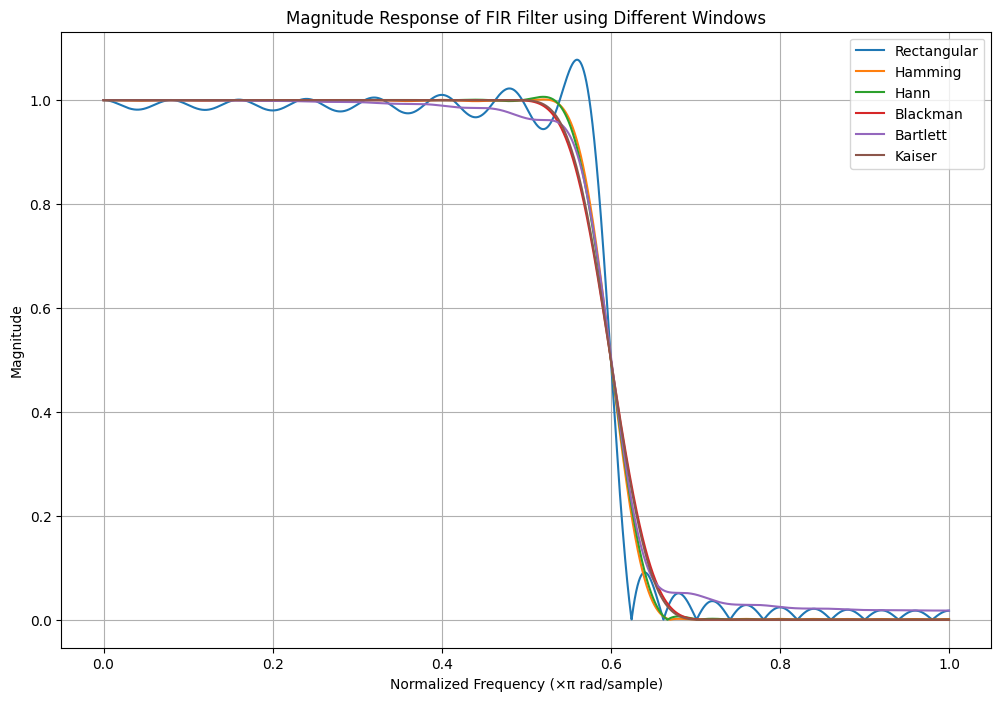

In [12]:
# Filter specifications
num_taps = 51                      # Filter order (number of taps)
cutoff = 0.3                       # Normalized cutoff frequency (0 to 1)
fs = 1.0                           # Normalized sampling frequency

# Corrected window names
windows = ['rectangular', 'hamming', 'hann', 'blackman', 'bartlett', 'kaiser']

# Design and plot each window's filter response
plt.figure(figsize=(12, 8))

for win in windows:
    if win == 'kaiser':
        b = firwin(num_taps, cutoff, window=(win, 8), fs=fs)  # Beta = 8 for Kaiser
    elif win == 'rectangular':
        b = firwin(num_taps, cutoff, window='boxcar', fs=fs)  # 'boxcar' = rectangular
    else:
        b = firwin(num_taps, cutoff, window=win, fs=fs)

    w, h = freqz(b, worN=8000)
    plt.plot(w / np.pi, abs(h), label=win.capitalize())

# Plot formatting
plt.title('Magnitude Response of FIR Filter using Different Windows')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.show()


# ** Task 1 : Modify Cutoff Frequency**

*   **Change the cutoff frequency to 0.5 and observe the changes in the magnitude response.**
*   **Hint: Modify the cutoff variable in the script.**



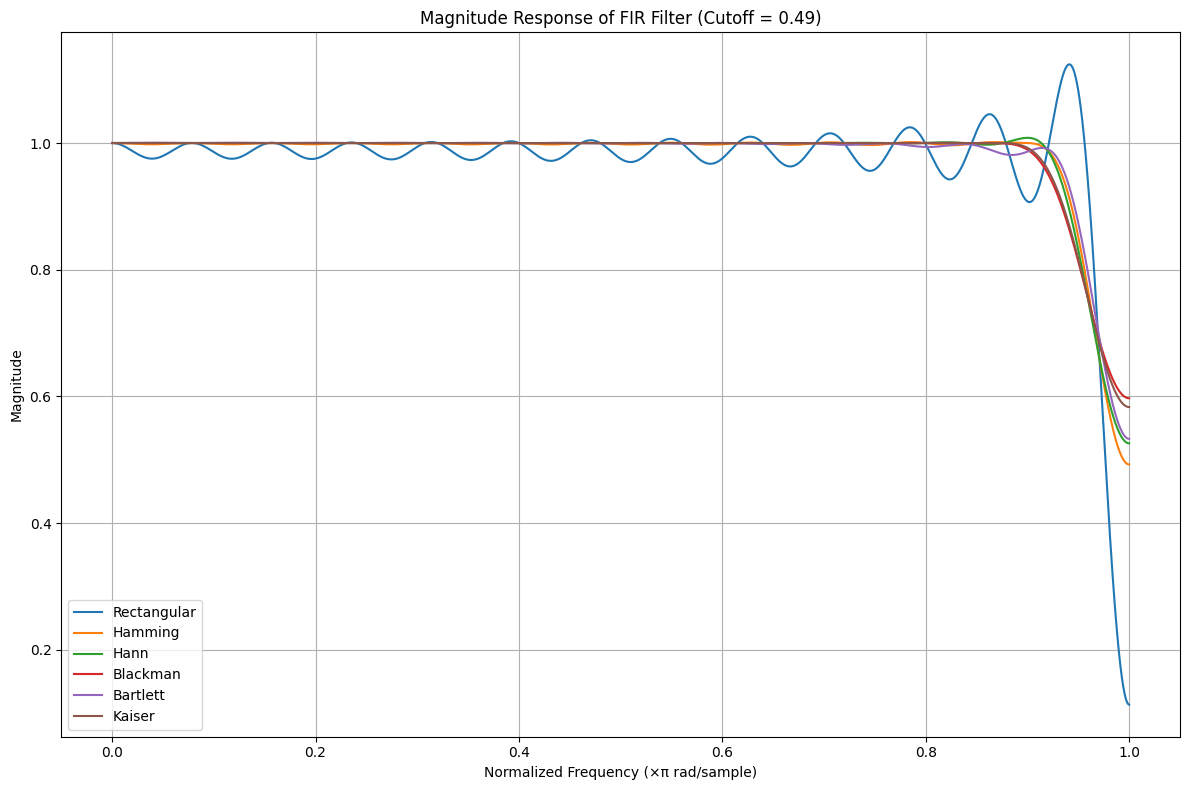

In [13]:
# Filter specifications
num_taps = 51                      # Filter order (number of taps)
cutoff = 0.49                      # Modified cutoff frequency (must be < fs/2)
fs = 1.0                           # Normalized sampling frequency

# Window types
windows = ['rectangular', 'hamming', 'hann', 'blackman', 'bartlett', 'kaiser']

# Design and plot each window's filter response
plt.figure(figsize=(12, 8))

for win in windows:
    if win == 'kaiser':
        b = firwin(num_taps, cutoff, window=(win, 8), fs=fs)  # Beta = 8 for Kaiser
    elif win == 'rectangular':
        b = firwin(num_taps, cutoff, window='boxcar', fs=fs)  # 'boxcar' = rectangular
    else:
        b = firwin(num_taps, cutoff, window=win, fs=fs)

    w, h = freqz(b, worN=8000)
    plt.plot(w / np.pi, abs(h), label=win.capitalize())

# Plot formatting
plt.title('Magnitude Response of FIR Filter (Cutoff = 0.49)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Task 2 : Implement a High-Pass FIR Filter**

*   **Instead of a low-pass filter, design a high-pass FIR filter.**
*   **Hint: Use the pass_zero=False argument in the firwin function.**



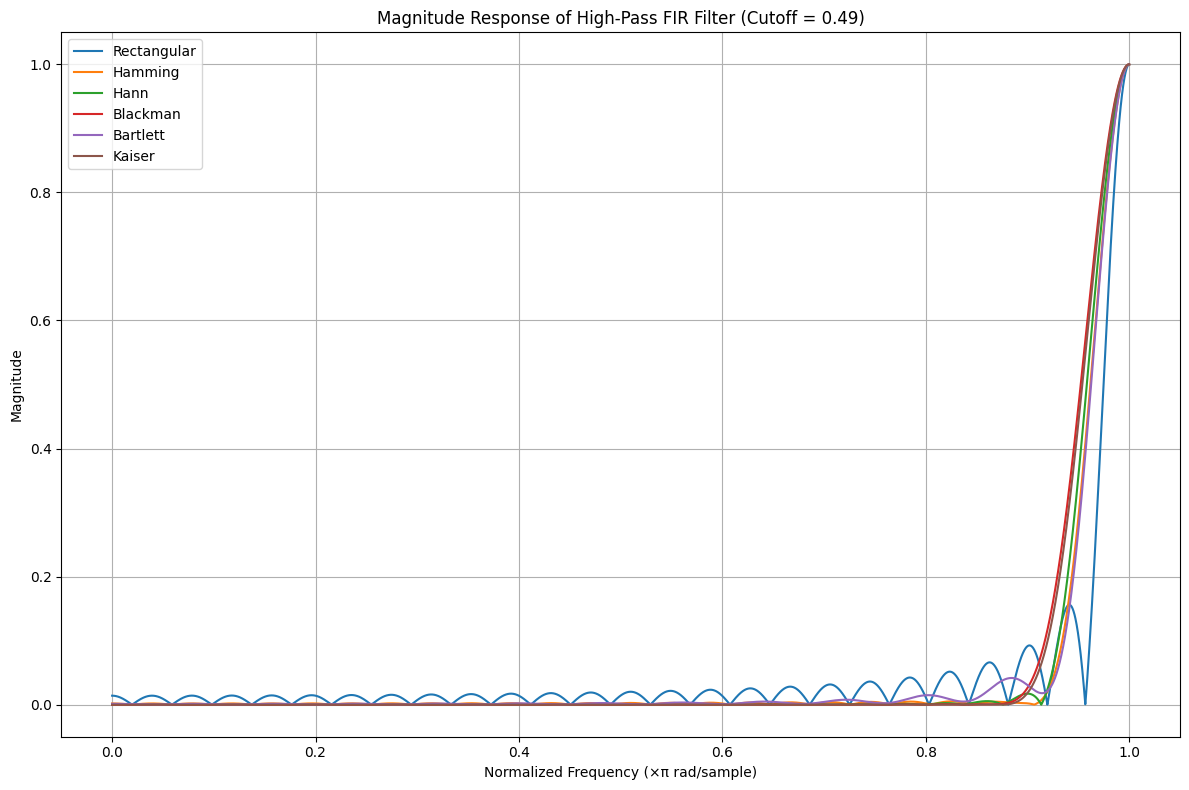

In [14]:
# Window types
windows = ['rectangular', 'hamming', 'hann', 'blackman', 'bartlett', 'kaiser']

# Design and plot each window's high-pass filter response
plt.figure(figsize=(12, 8))

for win in windows:
    if win == 'kaiser':
        b = firwin(num_taps, cutoff, window=(win, 8), fs=fs, pass_zero=False)
    elif win == 'rectangular':
        b = firwin(num_taps, cutoff, window='boxcar', fs=fs, pass_zero=False)
    else:
        b = firwin(num_taps, cutoff, window=win, fs=fs, pass_zero=False)

    w, h = freqz(b, worN=8000)
    plt.plot(w / np.pi, abs(h), label=win.capitalize())

# Plot formatting
plt.title('Magnitude Response of High-Pass FIR Filter (Cutoff = 0.49)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Task 3 : Compare FIR with IIR Butterworth Filter**

*   **Design an IIR Butterworth filter of the same order and compare its response with an FIR filter.**
*   **Hint: Use scipy.signal.butter() for Butterworth filter design.**



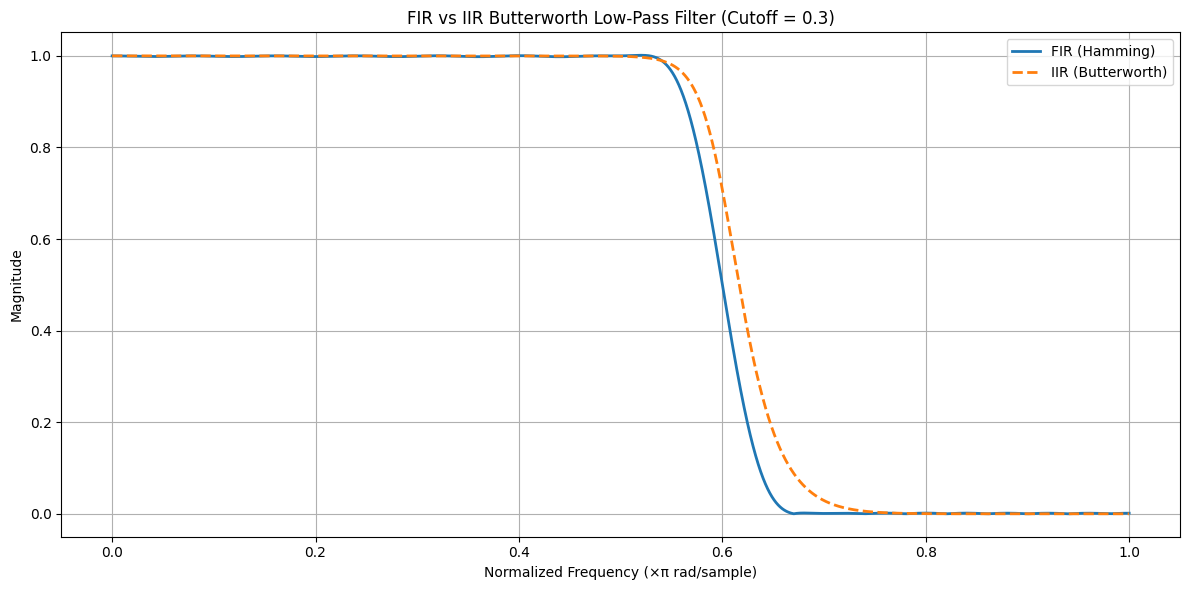

In [15]:
# Filter specifications
num_taps = 51                      # FIR filter order
butter_order = 10                  # Reasonable IIR order for comparison
cutoff = 0.3                       # Normalized cutoff frequency (0 < cutoff < 0.5)
fs = 1.0                           # Normalized sampling frequency

# Design FIR low-pass filter using Hamming window
fir_coeffs = firwin(num_taps, cutoff, window='hamming', fs=fs)

# Design IIR Butterworth low-pass filter
b_iir, a_iir = butter(butter_order, cutoff, btype='low', analog=False, fs=fs)

# Frequency response
w_fir, h_fir = freqz(fir_coeffs, worN=8000)
w_iir, h_iir = freqz(b_iir, a_iir, worN=8000)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(w_fir / np.pi, abs(h_fir), label='FIR (Hamming)', linewidth=2)
plt.plot(w_iir / np.pi, abs(h_iir), label='IIR (Butterworth)', linestyle='--', linewidth=2)

plt.title('FIR vs IIR Butterworth Low-Pass Filter (Cutoff = 0.3)')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Task 4 : Try Different Kaiser Beta Values**

*   **Modify the Kaiser window parameter (beta) to see how it affects the filter response.**
*   **Hint: Change beta values in firwin(num_taps, cutoff, window=(win, beta)).**



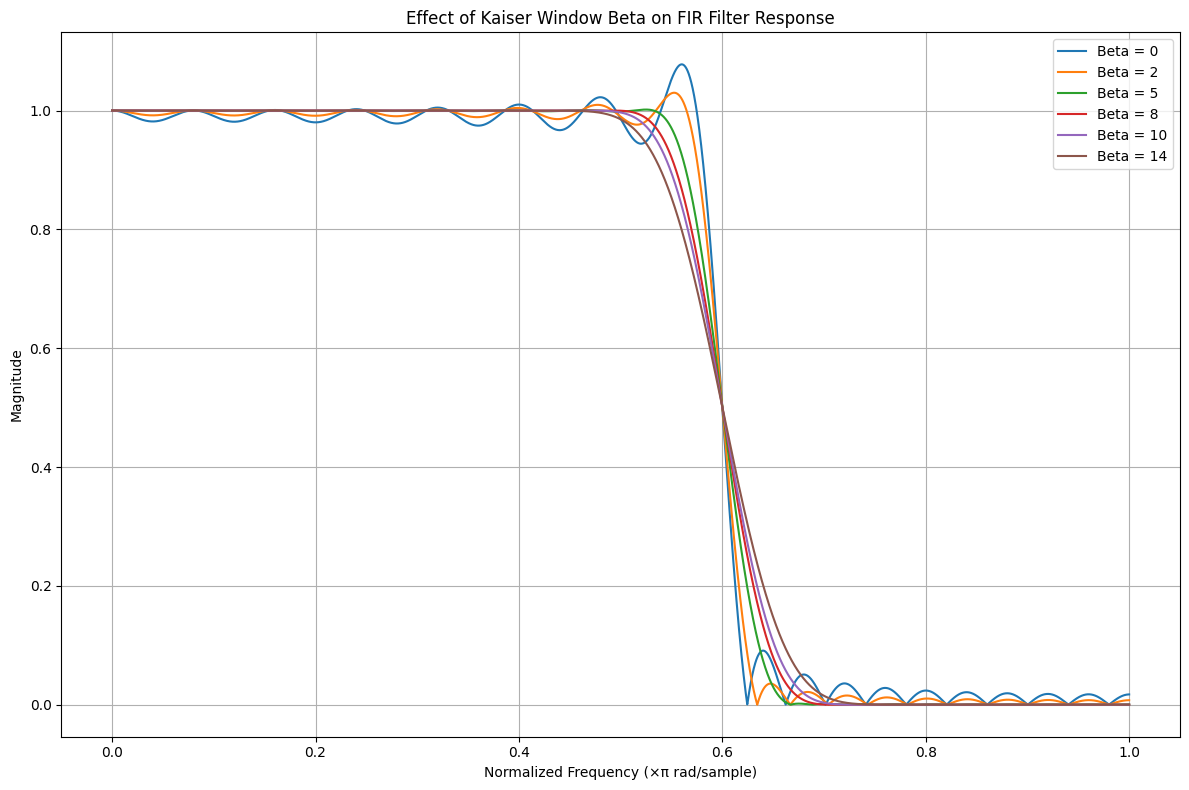

In [17]:
# Filter specifications
num_taps = 51
cutoff = 0.3
fs = 1.0

# Different beta values for Kaiser window
beta_values = [0, 2, 5, 8, 10, 14]  # 0 = rectangular (no tapering), higher = more attenuation

plt.figure(figsize=(12, 8))

for beta in beta_values:
    b = firwin(num_taps, cutoff, window=('kaiser', beta), fs=fs)
    w, h = freqz(b, worN=8000)
    plt.plot(w / np.pi, abs(h), label=f'Beta = {beta}')

# Plot formatting
plt.title('Effect of Kaiser Window Beta on FIR Filter Response')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Task 5 : Implement Band-Pass FIR Filter**

*   **Design a band-pass FIR filter using windowing.**
*   **Hint: Use a cutoff range like [0.2, 0.5] in firwin().**



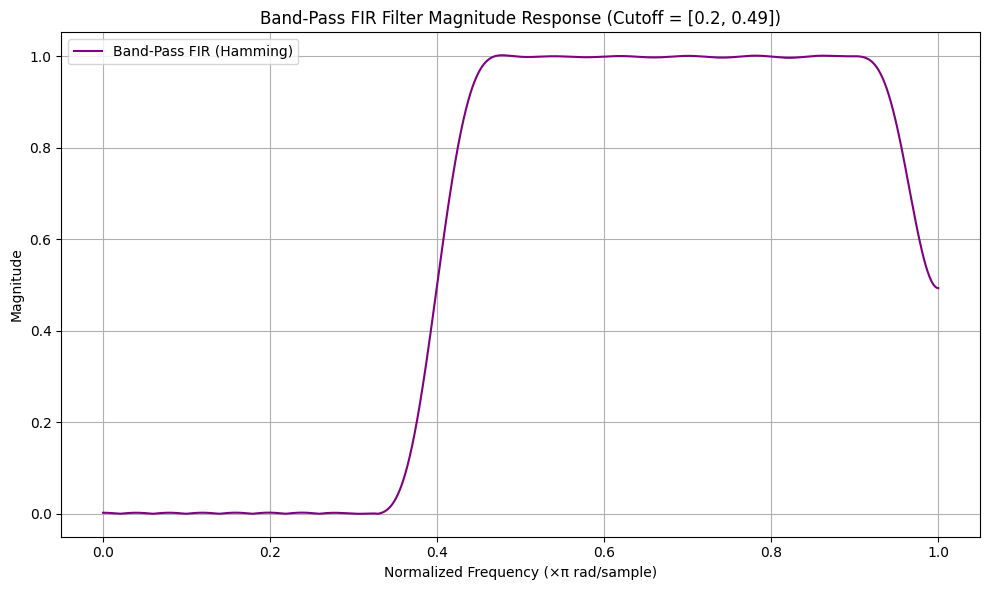

In [19]:
# Filter specifications
num_taps = 51                          # Filter order
cutoff = [0.2, 0.49]                   # Valid band-pass cutoff range
fs = 1.0                               # Normalized sampling frequency
window_type = 'hamming'               # Window type

# Design Band-Pass FIR Filter
b = firwin(num_taps, cutoff, window=window_type, pass_zero=False, fs=fs)

# Frequency response
w, h = freqz(b, worN=8000)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(w / np.pi, abs(h), label='Band-Pass FIR (Hamming)', color='purple')
plt.title('Band-Pass FIR Filter Magnitude Response (Cutoff = [0.2, 0.49])')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()